In [6]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import capstone_2 as cap

In [7]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [8]:
df_docs_by_ep.head(20)

NameError: name 'df_docs_by_ep' is not defined

In [9]:
# Import Dataset
df_info, df_scripts = cap.load_data()
df_docs_by_ep = cap.agg_dialogue_by_episode(df_scripts, df_info)

# create corpus and titles
corpus = df_docs_by_ep.Dialogue.values
titles = df_docs_by_ep.Title.values
writers = df_docs_by_ep.Writers.values
seasons = df_docs_by_ep.Season.values

In [10]:
# clean up corpus slightly by removing distracting single quotes
data = [re.sub("\'", "", sent) for sent in corpus]

In [11]:
pprint(data[:1])

['Do you know what this is all about? Do you know, why were here? To be out, '
 'this is out...and out is one of the single most enjoyable experiences of '
 'life. People...did you ever hear people talking about We should go out? This '
 'is what theyre talking about...this whole thing, were all out now, no one is '
 'home. Not one person here is home, were all out! There are people tryin to '
 'find us, they dont know where we are. (on an imaginary phone) Did you ring?, '
 'I cant find him. Where did he go? He didnt tell me where he was going. He '
 'must have gone out. You wanna go out you get ready, you pick out the '
 'clothes, right? You take the shower, you get all ready, get the cash, get '
 'your friends, the car, the spot, the reservation...Then youre standing '
 'around, whatta you do? You go We gotta be getting back. Once youre out, you '
 'wanna get back! You wanna go to sleep, you wanna get up, you wanna go out '
 'again tomorrow, right? Where ever you are in life, its my 

In [12]:
# Tokenize words and clean up text
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [13]:
data_words = list(sent_to_words(data))
pprint(data_words[:2])

[['do',
  'you',
  'know',
  'what',
  'this',
  'is',
  'all',
  'about',
  'do',
  'you',
  'know',
  'why',
  'were',
  'here',
  'to',
  'be',
  'out',
  'this',
  'is',
  'out',
  'and',
  'out',
  'is',
  'one',
  'of',
  'the',
  'single',
  'most',
  'enjoyable',
  'experiences',
  'of',
  'life',
  'people',
  'did',
  'you',
  'ever',
  'hear',
  'people',
  'talking',
  'about',
  'we',
  'should',
  'go',
  'out',
  'this',
  'is',
  'what',
  'theyre',
  'talking',
  'about',
  'this',
  'whole',
  'thing',
  'were',
  'all',
  'out',
  'now',
  'no',
  'one',
  'is',
  'home',
  'not',
  'one',
  'person',
  'here',
  'is',
  'home',
  'were',
  'all',
  'out',
  'there',
  'are',
  'people',
  'tryin',
  'to',
  'find',
  'us',
  'they',
  'dont',
  'know',
  'where',
  'we',
  'are',
  'on',
  'an',
  'imaginary',
  'phone',
  'did',
  'you',
  'ring',
  'cant',
  'find',
  'him',
  'where',
  'did',
  'he',
  'go',
  'he',
  'didnt',
  'tell',
  'me',
  'where',
  'he'

  'let',
  'me',
  'talk',
  'to',
  'her',
  'to',
  'the',
  'phone',
  'no',
  'believe',
  'me',
  'im',
  'always',
  'up',
  'at',
  'this',
  'hour',
  'how',
  'are',
  'you',
  'great',
  'sure',
  'what',
  'time',
  'does',
  'the',
  'plane',
  'get',
  'in',
  'got',
  'my',
  'friend',
  'george',
  'to',
  'take',
  'me',
  'to',
  'the',
  'tv',
  'slide',
  'wow',
  'no',
  'its',
  'its',
  'just',
  'my',
  'neighbour',
  'um',
  'yeah',
  'got',
  'it',
  'jerry',
  'takes',
  'pencil',
  'and',
  'cereal',
  'box',
  'to',
  'write',
  'on',
  'ten',
  'fifteen',
  'no',
  'dont',
  'be',
  'silly',
  'go',
  'ahead',
  'and',
  'ask',
  'yeah',
  'sure',
  'okay',
  'great',
  'no',
  'no',
  'its',
  'no',
  'trouble',
  'at',
  'all',
  'ill',
  'see',
  'you',
  'tomorrow',
  'great',
  'bye',
  'he',
  'hangs',
  'up',
  'the',
  'phone',
  'to',
  'kessler',
  'dont',
  'believe',
  'it',
  'that',
  'was',
  'her',
  'she',
  'wants',
  'to',
  'stay',
  'he

  'men',
  'want',
  'what',
  'do',
  'we',
  'want',
  'we',
  'want',
  'women',
  'thats',
  'it',
  'its',
  'the',
  'only',
  'thing',
  'we',
  'know',
  'for',
  'sure',
  'it',
  'really',
  'is',
  'we',
  'want',
  'women',
  'how',
  'do',
  'we',
  'get',
  'them',
  'oh',
  'we',
  'dont',
  'know',
  'bout',
  'that',
  'we',
  'dont',
  'know',
  'the',
  'next',
  'step',
  'after',
  'that',
  'we',
  'have',
  'no',
  'idea',
  'this',
  'is',
  'why',
  'you',
  'see',
  'men',
  'honking',
  'car',
  'horns',
  'yelling',
  'from',
  'construction',
  'sites',
  'these',
  'are',
  'the',
  'best',
  'ideas',
  'weve',
  'had',
  'so',
  'far',
  'the',
  'car',
  'horn',
  'honk',
  'is',
  'that',
  'beauty',
  'have',
  'you',
  'seen',
  'men',
  'doing',
  'this',
  'what',
  'is',
  'this',
  'the',
  'man',
  'is',
  'in',
  'the',
  'car',
  'the',
  'woman',
  'walks',
  'by',
  'the',
  'front',
  'of',
  'the',
  'car',
  'he',
  'honks',
  'eeehh',
  '

  'party',
  'and',
  'know',
  'where',
  'she',
  'works',
  'but',
  'dont',
  'know',
  'her',
  'name',
  'so',
  'why',
  'dont',
  'you',
  'ask',
  'someone',
  'who',
  'was',
  'at',
  'the',
  'party',
  'nah',
  'the',
  'only',
  'one',
  'could',
  'ask',
  'is',
  'elaine',
  'and',
  'cant',
  'ask',
  'her',
  'why',
  'not',
  'because',
  'its',
  'complicated',
  'theres',
  'some',
  'tension',
  'there',
  'he',
  'used',
  'to',
  'go',
  'with',
  'her',
  'which',
  'one',
  'is',
  'she',
  'from',
  'maryland',
  'the',
  'one',
  'who',
  'brought',
  'you',
  'the',
  'chocolate',
  'covered',
  'cherries',
  'you',
  'didnt',
  'like',
  'oh',
  'yeah',
  'very',
  'alert',
  'warm',
  'person',
  'oh',
  'yeah',
  'shes',
  'great',
  'so',
  'how',
  'come',
  'nothing',
  'materialized',
  'there',
  'well',
  'its',
  'tough',
  'thing',
  'to',
  'talk',
  'about',
  'uh',
  'dunno',
  'know',
  'what',
  'it',
  'was',
  'you',
  'dont',
  'know',
  

  'right',
  'sir',
  'and',
  'hes',
  'hilarious',
  'now',
  'thats',
  'not',
  'fair',
  'so',
  'where',
  'did',
  'you',
  'meet',
  'this',
  'guy',
  'staked',
  'out',
  'his',
  'health',
  'club',
  'uh',
  'huh',
  'when',
  'youre',
  'on',
  'stakeout',
  'do',
  'you',
  'find',
  'its',
  'better',
  'to',
  'stand',
  'up',
  'against',
  'the',
  'wall',
  'or',
  'kinda',
  'crouch',
  'down',
  'behind',
  'big',
  'plant',
  'yknow',
  'think',
  'that',
  'even',
  'if',
  'youve',
  'had',
  'relationship',
  'with',
  'someone',
  'or',
  'lets',
  'say',
  'especially',
  'if',
  'youve',
  'had',
  'relationship',
  'with',
  'someone',
  'and',
  'you',
  'try',
  'to',
  'become',
  'friends',
  'afterwards',
  'its',
  'very',
  'difficult',
  'isnt',
  'this',
  'its',
  'hard',
  'because',
  'you',
  'know',
  'each',
  'other',
  'so',
  'well',
  'you',
  'know',
  'all',
  'of',
  'each',
  'others',
  'tricks',
  'its',
  'like',
  'two',
  'magici

In [14]:
# Creating Bigram and Trigram Models
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=10) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=10)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/anaconda3/lib/python3.7/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/anaconda3/lib/python3.7/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/anaconda3/lib/python3.7/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/anaconda3/lib/python3.7/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/anaconda3/l

/anaconda3/lib/python3.7/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/anaconda3/lib/python3.7/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/anaconda3/lib/python3.7/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/anaconda3/lib/python3.7/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/anaconda3/l

/anaconda3/lib/python3.7/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/anaconda3/lib/python3.7/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/anaconda3/lib/python3.7/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/anaconda3/lib/python3.7/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/anaconda3/l

/anaconda3/lib/python3.7/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/anaconda3/lib/python3.7/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/anaconda3/lib/python3.7/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/anaconda3/lib/python3.7/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/anaconda3/l

/anaconda3/lib/python3.7/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/anaconda3/lib/python3.7/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/anaconda3/lib/python3.7/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/anaconda3/lib/python3.7/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/anaconda3/l

In [15]:
print(bigram_mod)

In [16]:
print(len(data_words))

174


In [17]:
# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['do', 'you', 'know', 'what', 'this', 'is', 'all', 'about', 'do', 'you', 'know', 'why', 'were', 'here', 'to', 'be', 'out', 'this', 'is', 'out', 'and', 'out', 'is', 'one_of', 'the', 'single', 'most', 'enjoyable', 'experiences', 'of', 'life', 'people', 'did', 'you', 'ever', 'hear', 'people', 'talking_about', 'we_should', 'go', 'out', 'this', 'is', 'what', 'theyre', 'talking_about', 'this', 'whole_thing', 'were', 'all', 'out', 'now', 'no', 'one', 'is', 'home', 'not', 'one', 'person', 'here', 'is', 'home', 'were', 'all', 'out', 'there', 'are', 'people', 'tryin_to', 'find', 'us', 'they', 'dont_know', 'where', 'we', 'are', 'on', 'an', 'imaginary', 'phone', 'did', 'you', 'ring', 'cant_find', 'him', 'where_did', 'he', 'go', 'he', 'didnt', 'tell_me', 'where', 'he', 'was', 'going', 'he', 'must_have', 'gone', 'out', 'you', 'wanna_go', 'out', 'you', 'get', 'ready', 'you', 'pick', 'out', 'the', 'clothes', 'right', 'you', 'take', 'the', 'shower', 'you', 'get', 'all', 'ready', 'get', 'the', 'cash', '

In [18]:
# See trigram example
print(bigram_mod[data_words[0]])

['do', 'you', 'know', 'what', 'this', 'is', 'all', 'about', 'do', 'you', 'know', 'why', 'were', 'here', 'to', 'be', 'out', 'this', 'is', 'out', 'and', 'out', 'is', 'one', 'of', 'the', 'single', 'most', 'enjoyable', 'experiences', 'of', 'life', 'people', 'did', 'you', 'ever', 'hear', 'people', 'talking_about', 'we_should', 'go', 'out', 'this', 'is', 'what', 'theyre', 'talking_about', 'this', 'whole_thing', 'were', 'all', 'out', 'now', 'no', 'one', 'is', 'home', 'not', 'one', 'person', 'here', 'is', 'home', 'were', 'all', 'out', 'there', 'are', 'people', 'tryin_to', 'find', 'us', 'they', 'dont_know', 'where', 'we', 'are', 'on', 'an', 'imaginary', 'phone', 'did', 'you', 'ring', 'cant_find', 'him', 'where', 'did', 'he', 'go', 'he', 'didnt', 'tell', 'me', 'where', 'he', 'was', 'going', 'he', 'must_have', 'gone', 'out', 'you', 'wanna_go', 'out', 'you', 'get', 'ready', 'you', 'pick', 'out', 'the', 'clothes', 'right', 'you', 'take', 'the', 'shower', 'you', 'get', 'all', 'ready', 'get', 'the', 

In [19]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def remove_stopwords_alt(texts):
    return [[word for word in doc if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [20]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
data_words_nostops_alt = remove_stopwords_alt(data_words)

# make sure methodologies are the same
data_words_nostops == data_words_nostops_alt

True

In [21]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
data_words_bigrams

[['know',
  'know',
  'one',
  'single',
  'enjoyable',
  'experiences',
  'life',
  'people',
  'ever',
  'hear',
  'people',
  'talking',
  'go',
  'theyre',
  'talking',
  'whole_thing',
  'one',
  'home',
  'one',
  'person',
  'home',
  'people',
  'tryin',
  'find',
  'us',
  'dont_know',
  'imaginary',
  'phone',
  'ring',
  'cant_find',
  'go',
  'didnt',
  'tell',
  'going',
  'must',
  'gone',
  'wanna_go',
  'get',
  'ready',
  'pick',
  'clothes',
  'right',
  'take',
  'shower',
  'get',
  'ready',
  'get',
  'cash',
  'get',
  'friends',
  'car',
  'spot',
  'reservation',
  'youre',
  'standing',
  'around',
  'whatta',
  'go',
  'gotta',
  'getting',
  'back',
  'youre',
  'wanna',
  'get',
  'back',
  'wanna_go',
  'sleep',
  'wanna',
  'get',
  'wanna_go',
  'tomorrow',
  'right',
  'ever',
  'life',
  'feeling',
  'youve',
  'gotta_go',
  'pointing',
  'georges',
  'shirt',
  'see',
  'button',
  'worst',
  'possible',
  'spot',
  'second',
  'button',
  'literally',

In [22]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

In [23]:
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
data_lemmatized

[['know',
  'know',
  'single',
  'enjoyable',
  'experience',
  'life',
  'people',
  'ever',
  'hear',
  'people',
  'talk',
  'go',
  'be',
  'talk',
  'whole_th',
  'home',
  'person',
  'home',
  'people',
  'tryin',
  'find',
  'imaginary',
  'phone',
  'ring',
  'cant_find',
  'go',
  'do',
  'not',
  'tell',
  'go',
  'must',
  'gone',
  'wanna_go',
  'get',
  'ready',
  'pick',
  'clothe',
  'right',
  'take',
  'shower',
  'get',
  'ready',
  'get',
  'cash',
  'get',
  'friend',
  'car',
  'spot',
  'reservation',
  'be',
  'stand',
  'around',
  'whatta',
  'go',
  'get',
  'get',
  'back',
  'be',
  'wanna',
  'get',
  'back',
  'wanna_go',
  'sleep',
  'wanna',
  'get',
  'wanna_go',
  'tomorrow',
  'right',
  'ever',
  'life',
  'feel',
  'have',
  'gotta_go',
  'point',
  'george',
  'shirt',
  'see',
  'button',
  'bad',
  'possible',
  'spot',
  'second',
  'button',
  'literally',
  'make',
  'break',
  'shirt',
  'look',
  'high',
  'man',
  'land',
  'look',
  'liv

In [24]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

print(len(corpus))
id2word[1]

[[(0, 1), (1, 3), (2, 1), (3, 1), (4, 1), (5, 1), (6, 3), (7, 2), (8, 4), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 3), (17, 2), (18, 1), (19, 3), (20, 1), (21, 1), (22, 3), (23, 1), (24, 7), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1), (30, 3), (31, 5), (32, 6), (33, 1), (34, 5), (35, 1), (36, 4), (37, 50), (38, 1), (39, 1), (40, 3), (41, 1), (42, 1), (43, 3), (44, 2), (45, 2), (46, 1), (47, 1), (48, 3), (49, 1), (50, 3), (51, 1), (52, 1), (53, 2), (54, 1), (55, 1), (56, 1), (57, 2), (58, 3), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 2), (66, 1), (67, 6), (68, 2), (69, 1), (70, 3), (71, 8), (72, 7), (73, 4), (74, 1), (75, 5), (76, 2), (77, 1), (78, 1), (79, 1), (80, 1), (81, 2), (82, 1), (83, 1), (84, 2), (85, 4), (86, 1), (87, 1), (88, 4), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 17), (96, 4), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 2), (103, 5), (104, 3), (105, 9), (106, 2), (107, 1), (108, 1), (109, 1), (110, 

'actually'

In [25]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('absolutely', 1),
  ('actually', 3),
  ('admit', 1),
  ('affected', 1),
  ('ahead', 1),
  ('allow', 1),
  ('almost', 3),
  ('already', 2),
  ('always', 4),
  ('amazing', 2),
  ('amazing_th', 1),
  ('ammonia', 1),
  ('analyze', 1),
  ('answer', 1),
  ('answering', 1),
  ('anybody', 1),
  ('anything', 3),
  ('anyway', 2),
  ('apart', 1),
  ('area', 3),
  ('arm', 1),
  ('around', 1),
  ('article', 3),
  ('aside', 1),
  ('ask', 7),
  ('avoid', 1),
  ('aware', 1),
  ('away', 1),
  ('awkward', 2),
  ('babe', 1),
  ('back', 3),
  ('bad', 5),
  ('bag', 6),
  ('baggy', 1),
  ('ball', 5),
  ('basket', 1),
  ('bathroom', 4),
  ('be', 50),
  ('beautiful', 1),
  ('beauty', 1),
  ('because', 3),
  ('bed', 1),
  ('being', 1),
  ('believe', 3),
  ('better', 2),
  ('big', 2),
  ('bill', 1),
  ('blindfold', 1),
  ('bloodstain', 3),
  ('blow', 1),
  ('boat', 3),
  ('bore', 1),
  ('boss', 1),
  ('bottom', 2),
  ('bout', 1),
  ('box', 1),
  ('boy', 1),
  ('bread', 2),
  ('break', 3),
  ('bright', 1),
  

In [26]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [27]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.021*"be" + 0.017*"get" + 0.016*"s" + 0.013*"go" + 0.013*"not" + '
  '0.012*"jerry" + 0.010*"george" + 0.009*"know" + 0.008*"do" + '
  '0.007*"elaine"'),
 (1,
  '0.009*"van" + 0.008*"susie" + 0.008*"serenity" + 0.006*"pen" + '
  '0.005*"mentor" + 0.005*"catalog" + 0.004*"get" + 0.004*"computer" + '
  '0.004*"be" + 0.004*"frankie"'),
 (2,
  '0.010*"soup" + 0.006*"maid" + 0.006*"shmoopy" + 0.005*"darren" + '
  '0.005*"bone" + 0.005*"jacket" + 0.005*"gammy" + 0.005*"rickshaw" + '
  '0.004*"bob" + 0.004*"soup_nazi"'),
 (3,
  '0.009*"twix" + 0.009*"puddy" + 0.009*"calzone" + 0.008*"car" + '
  '0.007*"dealership" + 0.007*"gonorrhea" + 0.005*"hair" + 0.004*"tractor" + '
  '0.004*"babka" + 0.004*"mechanic"'),
 (4,
  '0.013*"s" + 0.012*"get" + 0.011*"be" + 0.011*"jerry" + 0.010*"car" + '
  '0.009*"not" + 0.006*"do" + 0.005*"well" + 0.005*"know" + 0.005*"kramer"'),
 (5,
  '0.019*"be" + 0.018*"s" + 0.015*"get" + 0.014*"not" + 0.011*"know" + '
  '0.010*"well" + 0.009*"do" + 0.008*"go" + 0

In [29]:
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'be', 'get', 'go', 's'])
print(len(data_words[0]))
data_words_nostops = remove_stopwords(data_words)
print(len(data_words_nostops[0]))
data_words_bigrams = make_bigrams(data_words_nostops)
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

3383
1764


In [30]:
words_to_remove = '''people
happen
bad
ask
anything
love
nice
show
doctor
eat
hear
watch
big
meet
dog
life
great
kind
start
funny
car
keep
head
find
feel
everything
pick
remember
boy
listen
hand
sit
move
sure
name
still
stop
wanna
new
day
phone
laugh
may
'''

In [31]:
words_to_remove_lst = words_to_remove.split()
words_to_remove_lst

['people',
 'happen',
 'bad',
 'ask',
 'anything',
 'love',
 'nice',
 'show',
 'doctor',
 'eat',
 'hear',
 'watch',
 'big',
 'meet',
 'dog',
 'life',
 'great',
 'kind',
 'start',
 'funny',
 'car',
 'keep',
 'head',
 'find',
 'feel',
 'everything',
 'pick',
 'remember',
 'boy',
 'listen',
 'hand',
 'sit',
 'move',
 'sure',
 'name',
 'still',
 'stop',
 'wanna',
 'new',
 'day',
 'phone',
 'laugh',
 'may']

In [32]:
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'be', 'get', 'go', 's', 
                  'know', 'see', 'come', 'want', 'look', 'jerry', 'george', 'kramer',
                  'well', 'tell', 'say', 'think', 'make', 'would', 'could', 'right',
                  'take', 'good', 'really', 'elaine', 'ill', 'back', 'guy', 'talk',
                  'something', 'mean', 'thing', 'call', 'give', 'let', 'man', 'little',
                  'way', 'friend', 'put', 'like', 'time', 'never', 'thank', 'work', 'need',
                  'woman', 'leave', 'maybe', 'try', 'nothing', 'much'])

stop_words.extend(words_to_remove_lst)

data_lemmatized = remove_stopwords(data_lemmatized)

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=14, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.018*"key" + 0.010*"chinese" + 0.010*"cape" + 0.008*"toby" + 0.008*"clown" '
  '+ 0.007*"bozo" + 0.007*"noreen" + 0.006*"haircut" + 0.006*"pensky" + '
  '0.006*"tonsil"'),
 (1,
  '0.011*"calzone" + 0.010*"money" + 0.007*"sniff" + 0.006*"marcelino" + '
  '0.006*"kurt" + 0.006*"date" + 0.005*"cockfight" + 0.005*"barry" + '
  '0.005*"celia" + 0.005*"bet"'),
 (2,
  '0.005*"play" + 0.005*"pen" + 0.004*"darren" + 0.004*"cake" + '
  '0.003*"bubble_boy" + 0.003*"hell" + 0.003*"wait" + 0.003*"together" + '
  '0.003*"hair" + 0.003*"dont_know"'),
 (3,
  '0.007*"soup" + 0.004*"walk" + 0.004*"money" + 0.004*"bania" + 0.003*"even" '
  '+ 0.003*"bra" + 0.003*"dont_know" + 0.003*"ticket" + 0.003*"hit" + '
  '0.003*"baby"'),
 (4,
  '0.012*"statue" + 0.010*"space" + 0.009*"ray" + 0.007*"first" + '
  '0.007*"coincidence" + 0.007*"contd" + 0.007*"garage" + 0.006*"front" + '
  '0.006*"beg" + 0.006*"rava"'),
 (5,
  '0.005*"door" + 0.004*"apartment" + 0.004*"walk" + 0.003*"break" + '
  '0.003*"place

In [33]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.536476523553194

Coherence Score:  0.35748440083120964


In [ ]:
# num_topics = 5
# Perplexity:  -8.244111837333914
# Coherence Score:  0.23389858201477215

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()

In [ ]:
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

In [241]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12     0.179805 -0.009474       1        1  45.146542
5      0.171412 -0.018395       2        1  16.296549
6      0.172023 -0.011496       3        1  11.884353
3      0.144282 -0.004839       4        1   7.793306
2      0.093608 -0.003373       5        1   5.074933
8      0.073709 -0.036890       6        1   3.702406
13     0.060651  0.183341       7        1   3.114259
7     -0.052621 -0.190235       8        1   2.253864
11    -0.112797  0.030537       9        1   1.592203
1     -0.067508  0.031241      10        1   1.416624
0     -0.173294  0.012793      11        1   0.693025
4     -0.165061  0.004035      12        1   0.500967
9     -0.169563  0.010296      13        1   0.407608
10    -0.154646  0.002460      14        1   0.123364, topic_info=     Category        Freq          Term       Total  loglift  logprob
673   Default  145.000000           key  145.000000  30.0000  30.0000
165   Default  235.000000         first  235.000000  29.0000  29.0000
713   Default  273.000000         money  273.000000  28.0000  28.0000
2842  Default  257.000000        newman  257.000000  27.0000  27.0000
3366  Default   96.000000         smell   96.000000  26.0000  26.0000
171   Default  129.000000         front  129.000000  25.0000  25.0000
1176  Default  287.000000         check  287.000000  24.0000  24.0000
101   Default  246.000000          date  246.000000  23.0000  23.0000
1394  Default  191.000000          year  191.000000  22.0000  22.0000
732   Default  128.000000         party  128.000000  21.0000  21.0000
2001  Default  134.000000           sex  134.000000  20.0000  20.0000
827   Default  322.000000          wear  322.000000  19.0000  19.0000
645   Default  119.000000          hair  119.000000  18.0000  18.0000
734   Default  115.000000         pause  115.000000  17.0000  17.0000
735   Default  226.000000           pay  226.000000  16.0000  16.0000
287   Default   72.000000         naked   72.000000  15.0000  15.0000
525   Default  275.000000     apartment  275.000000  14.0000  14.0000
2998  Default   66.000000      indicate   66.000000  13.0000  13.0000
2049  Default  167.000000          baby  167.000000  12.0000  12.0000
195   Default  311.000000          hold  311.000000  11.0000  11.0000
59    Default  273.000000           buy  273.000000  10.0000  10.0000
3503  Default   96.000000          soup   96.000000   9.0000   9.0000
415   Default   82.000000          step   82.000000   8.0000   8.0000
204   Default  197.000000         house  197.000000   7.0000   7.0000
1522  Default  225.000000         movie  225.000000   6.0000   6.0000
446   Default  241.000000         today  241.000000   5.0000   5.0000
158   Default  185.000000        father  185.000000   4.0000   4.0000
1822  Default   36.000000          tony   36.000000   3.0000   3.0000
543   Default   82.000000           bet   82.000000   2.0000   2.0000
473   Default  301.000000          wait  301.000000   1.0000   1.0000
...       ...         ...           ...         ...      ...      ...
5181  Topic14    0.215611        postum    0.923607   5.2430  -6.6649
5183  Topic14    0.215600    preemptive    0.923663   5.2429  -6.6650
5182  Topic14    0.215562         pouch    0.923870   5.2425  -6.6652
5199  Topic14    0.215550     waldstein    0.923935   5.2423  -6.6652
5119  Topic14    0.215549         appel    0.923944   5.2423  -6.6652
2236  Topic14    0.309021        benson    1.737391   4.9711  -6.3050
5163  Topic14    0.112959        messed    0.820783   4.7146  -7.3114
5172  Topic14    0.112958    organizing    0.820789   4.7145  -7.3114
5145  Topic14    0.112957          himm    0.820796   4.7145  -7.3114
5137  Topic14    0.112956         djiff    0.820801   4.7145  -7.3114
5162  Topic14    0.112953     mcbierney    0.820816   4.7145  -7.3114
5191  Topic14    0.112952        sonata    0.820822   4.7144  -7.3114
5117  Topic14

In [162]:
mallet_path = '/Users/mattdevor/galvanize/capstone_2/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# # Compute Coherence Score
# coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
# coherence_ldamallet = coherence_model_ldamallet.get_coherence()
# print('\nCoherence Score: ', coherence_ldamallet)

CalledProcessError: Command '/Users/mattdevor/galvanize/capstone_2/mallet-2.0.8/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /var/folders/x6/tgqskym50yv_884kmv43j8600000gp/T/e6d67_corpus.txt --output /var/folders/x6/tgqskym50yv_884kmv43j8600000gp/T/e6d67_corpus.mallet' returned non-zero exit status 1.

In [34]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(lda_model)
        coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
        coherence_values.append(coherence_model_lda.get_coherence())

    return model_list, coherence_values

In [35]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=1)

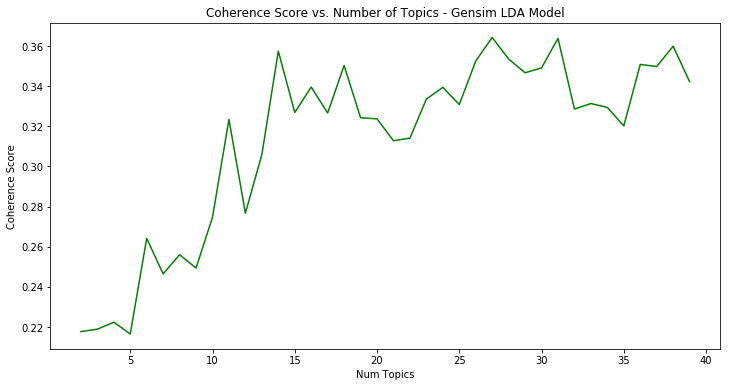

In [39]:
# Show graph
fig = plt.figure(figsize=(12,6))
limit=40; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values, label="Coherence Score", color='g')
plt.xlabel("Num Topics")
plt.ylabel("Coherence Score")
# plt.legend(loc='best')
plt.title("Coherence Score vs. Number of Topics - Gensim LDA Model")
plt.show()

In [38]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2177
Num Topics = 3  has Coherence Value of 0.2189
Num Topics = 4  has Coherence Value of 0.2224
Num Topics = 5  has Coherence Value of 0.2165
Num Topics = 6  has Coherence Value of 0.2642
Num Topics = 7  has Coherence Value of 0.2465
Num Topics = 8  has Coherence Value of 0.256
Num Topics = 9  has Coherence Value of 0.2494
Num Topics = 10  has Coherence Value of 0.2747
Num Topics = 11  has Coherence Value of 0.3235
Num Topics = 12  has Coherence Value of 0.2767
Num Topics = 13  has Coherence Value of 0.3059
Num Topics = 14  has Coherence Value of 0.3575
Num Topics = 15  has Coherence Value of 0.3269
Num Topics = 16  has Coherence Value of 0.3396
Num Topics = 17  has Coherence Value of 0.3267
Num Topics = 18  has Coherence Value of 0.3503
Num Topics = 19  has Coherence Value of 0.3243
Num Topics = 20  has Coherence Value of 0.3237
Num Topics = 21  has Coherence Value of 0.3128
Num Topics = 22  has Coherence Value of 0.3141
Num Topics = 23  has C

In [39]:
pprint(lda_model.show_topics(formatted=False))

[(10,
  [('richie', 0.006736416),
   ('intervention', 0.0066463132),
   ('beach', 0.004579109),
   ('polar', 0.003702172),
   ('pez_dispenser', 0.003702069),
   ('smell', 0.0036663134),
   ('intervene', 0.0030952916),
   ('mollika', 0.003094815),
   ('piano', 0.0024888124),
   ('recital', 0.002488378)]),
 (9,
  [('tony', 0.010623574),
   ('tuck', 0.010383366),
   ('cat', 0.0074593443),
   ('spare', 0.0064936415),
   ('square', 0.00604637),
   ('farfel', 0.0049594687),
   ('ply', 0.0039776266),
   ('maana', 0.003977567),
   ('lupe', 0.003977561),
   ('jane', 0.0039407164)]),
 (4,
  [('statue', 0.011676182),
   ('space', 0.009678912),
   ('ray', 0.008872305),
   ('first', 0.007368085),
   ('coincidence', 0.007340405),
   ('contd', 0.0069361012),
   ('garage', 0.006800491),
   ('front', 0.0063678045),
   ('beg', 0.0061426237),
   ('rava', 0.0060136216)]),
 (0,
  [('key', 0.017708955),
   ('chinese', 0.0095094135),
   ('cape', 0.009502678),
   ('toby', 0.008265773),
   ('clown', 0.00776273

In [45]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.006*"key" + 0.005*"lloyd" + 0.004*"apartment" + 0.004*"wear" + '
  '0.003*"point" + 0.003*"turn" + 0.003*"newman" + 0.003*"face" + '
  '0.003*"cough" + 0.003*"hot"'),
 (1,
  '0.008*"jimmy" + 0.006*"money" + 0.005*"van" + 0.005*"parent" + 0.004*"buy" '
  '+ 0.004*"sell" + 0.004*"wait" + 0.003*"dinner" + 0.003*"calzone" + '
  '0.003*"live"'),
 (2,
  '0.004*"write" + 0.003*"dont_know" + 0.003*"pen" + 0.003*"bone" + '
  '0.003*"play" + 0.003*"maid" + 0.003*"pay" + 0.003*"fine" + 0.003*"plane" + '
  '0.003*"lot"'),
 (3,
  '0.004*"soup" + 0.004*"movie" + 0.003*"money" + 0.003*"point" + 0.003*"nina" '
  '+ 0.003*"walk" + 0.003*"door" + 0.003*"even" + 0.003*"dollar" + '
  '0.003*"check"'),
 (4,
  '0.009*"assman" + 0.008*"pig_man" + 0.007*"mohel" + 0.006*"fake" + '
  '0.006*"swirl" + 0.005*"space" + 0.005*"fusilli" + 0.005*"baby" + '
  '0.005*"putty" + 0.004*"first"'),
 (5,
  '0.004*"door" + 0.003*"break" + 0.003*"walk" + 0.003*"guess" + '
  '0.003*"apartment" + 0.003*"turn" + 0.003*"

In [46]:
topics = lda_model.show_topics(formatted=False)
topics

[(0,
  [('key', 0.0061712572),
   ('lloyd', 0.005364009),
   ('apartment', 0.0041936617),
   ('wear', 0.0040682135),
   ('point', 0.0034385514),
   ('turn', 0.0034080378),
   ('newman', 0.003340972),
   ('face', 0.0031859202),
   ('cough', 0.0031515588),
   ('hot', 0.0030606028)]),
 (1,
  [('jimmy', 0.008400557),
   ('money', 0.005752486),
   ('van', 0.004967316),
   ('parent', 0.004756919),
   ('buy', 0.0043339734),
   ('sell', 0.0042719585),
   ('wait', 0.0042688986),
   ('dinner', 0.0033432413),
   ('calzone', 0.0033100548),
   ('live', 0.00324647)]),
 (2,
  [('write', 0.003941379),
   ('dont_know', 0.0033634645),
   ('pen', 0.0032766068),
   ('bone', 0.0028606362),
   ('play', 0.0028072107),
   ('maid', 0.0027922192),
   ('pay', 0.0027782498),
   ('fine', 0.0027254063),
   ('plane', 0.0027098672),
   ('lot', 0.0027058711)]),
 (3,
  [('soup', 0.0041622166),
   ('movie', 0.0040810197),
   ('money', 0.0033677),
   ('point', 0.0032591037),
   ('nina', 0.0031750042),
   ('walk', 0.00307

0
1
2
3
4
5
6
7
8
9
10


IndexError: list index out of range

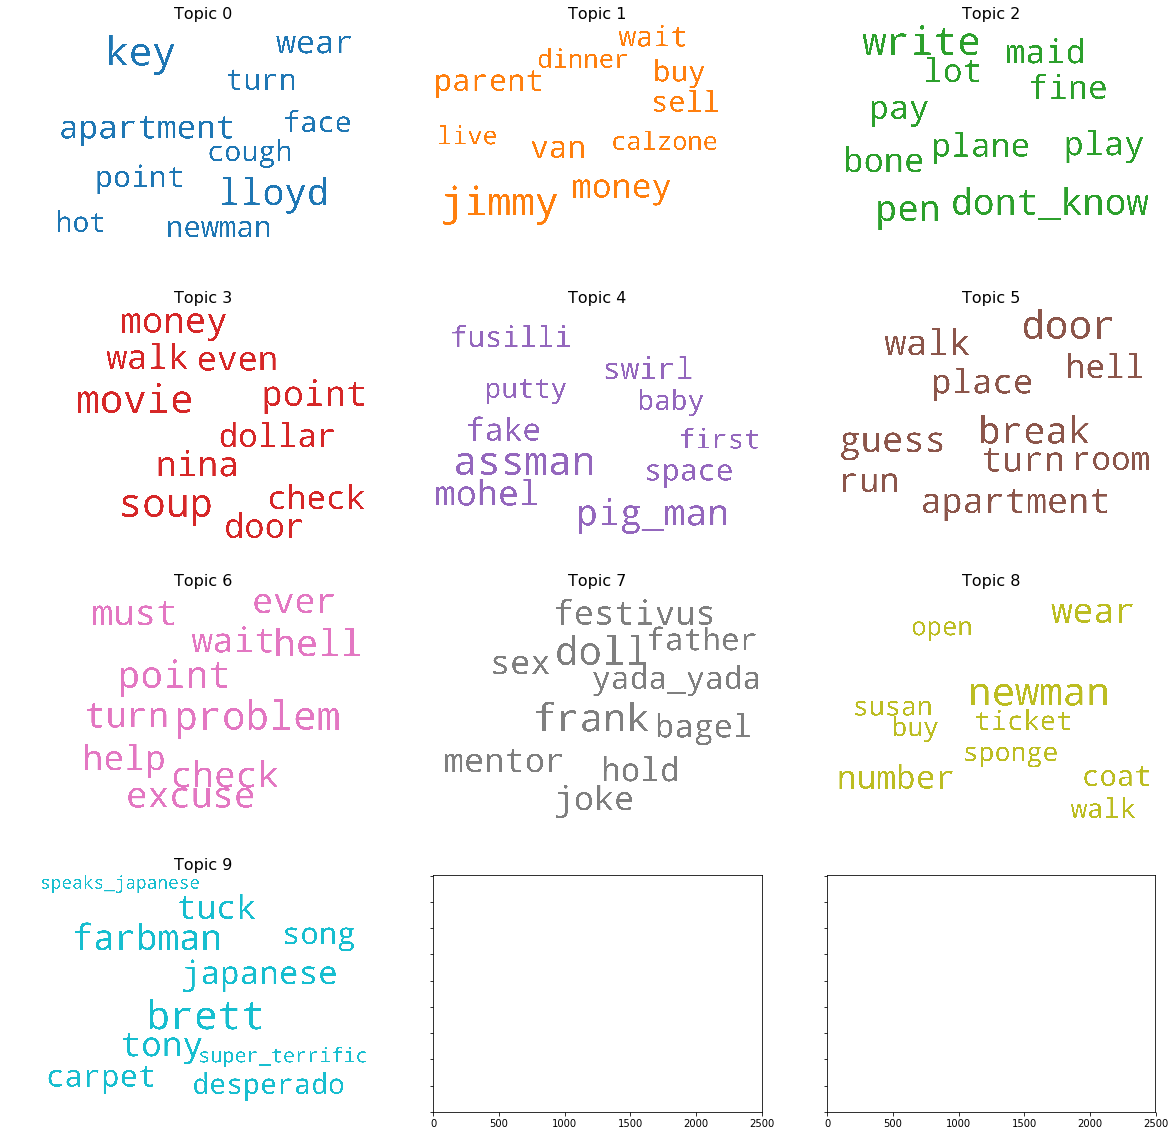

In [47]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(4, 3, figsize=(20,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    print(i)
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

IndexError: list index out of range

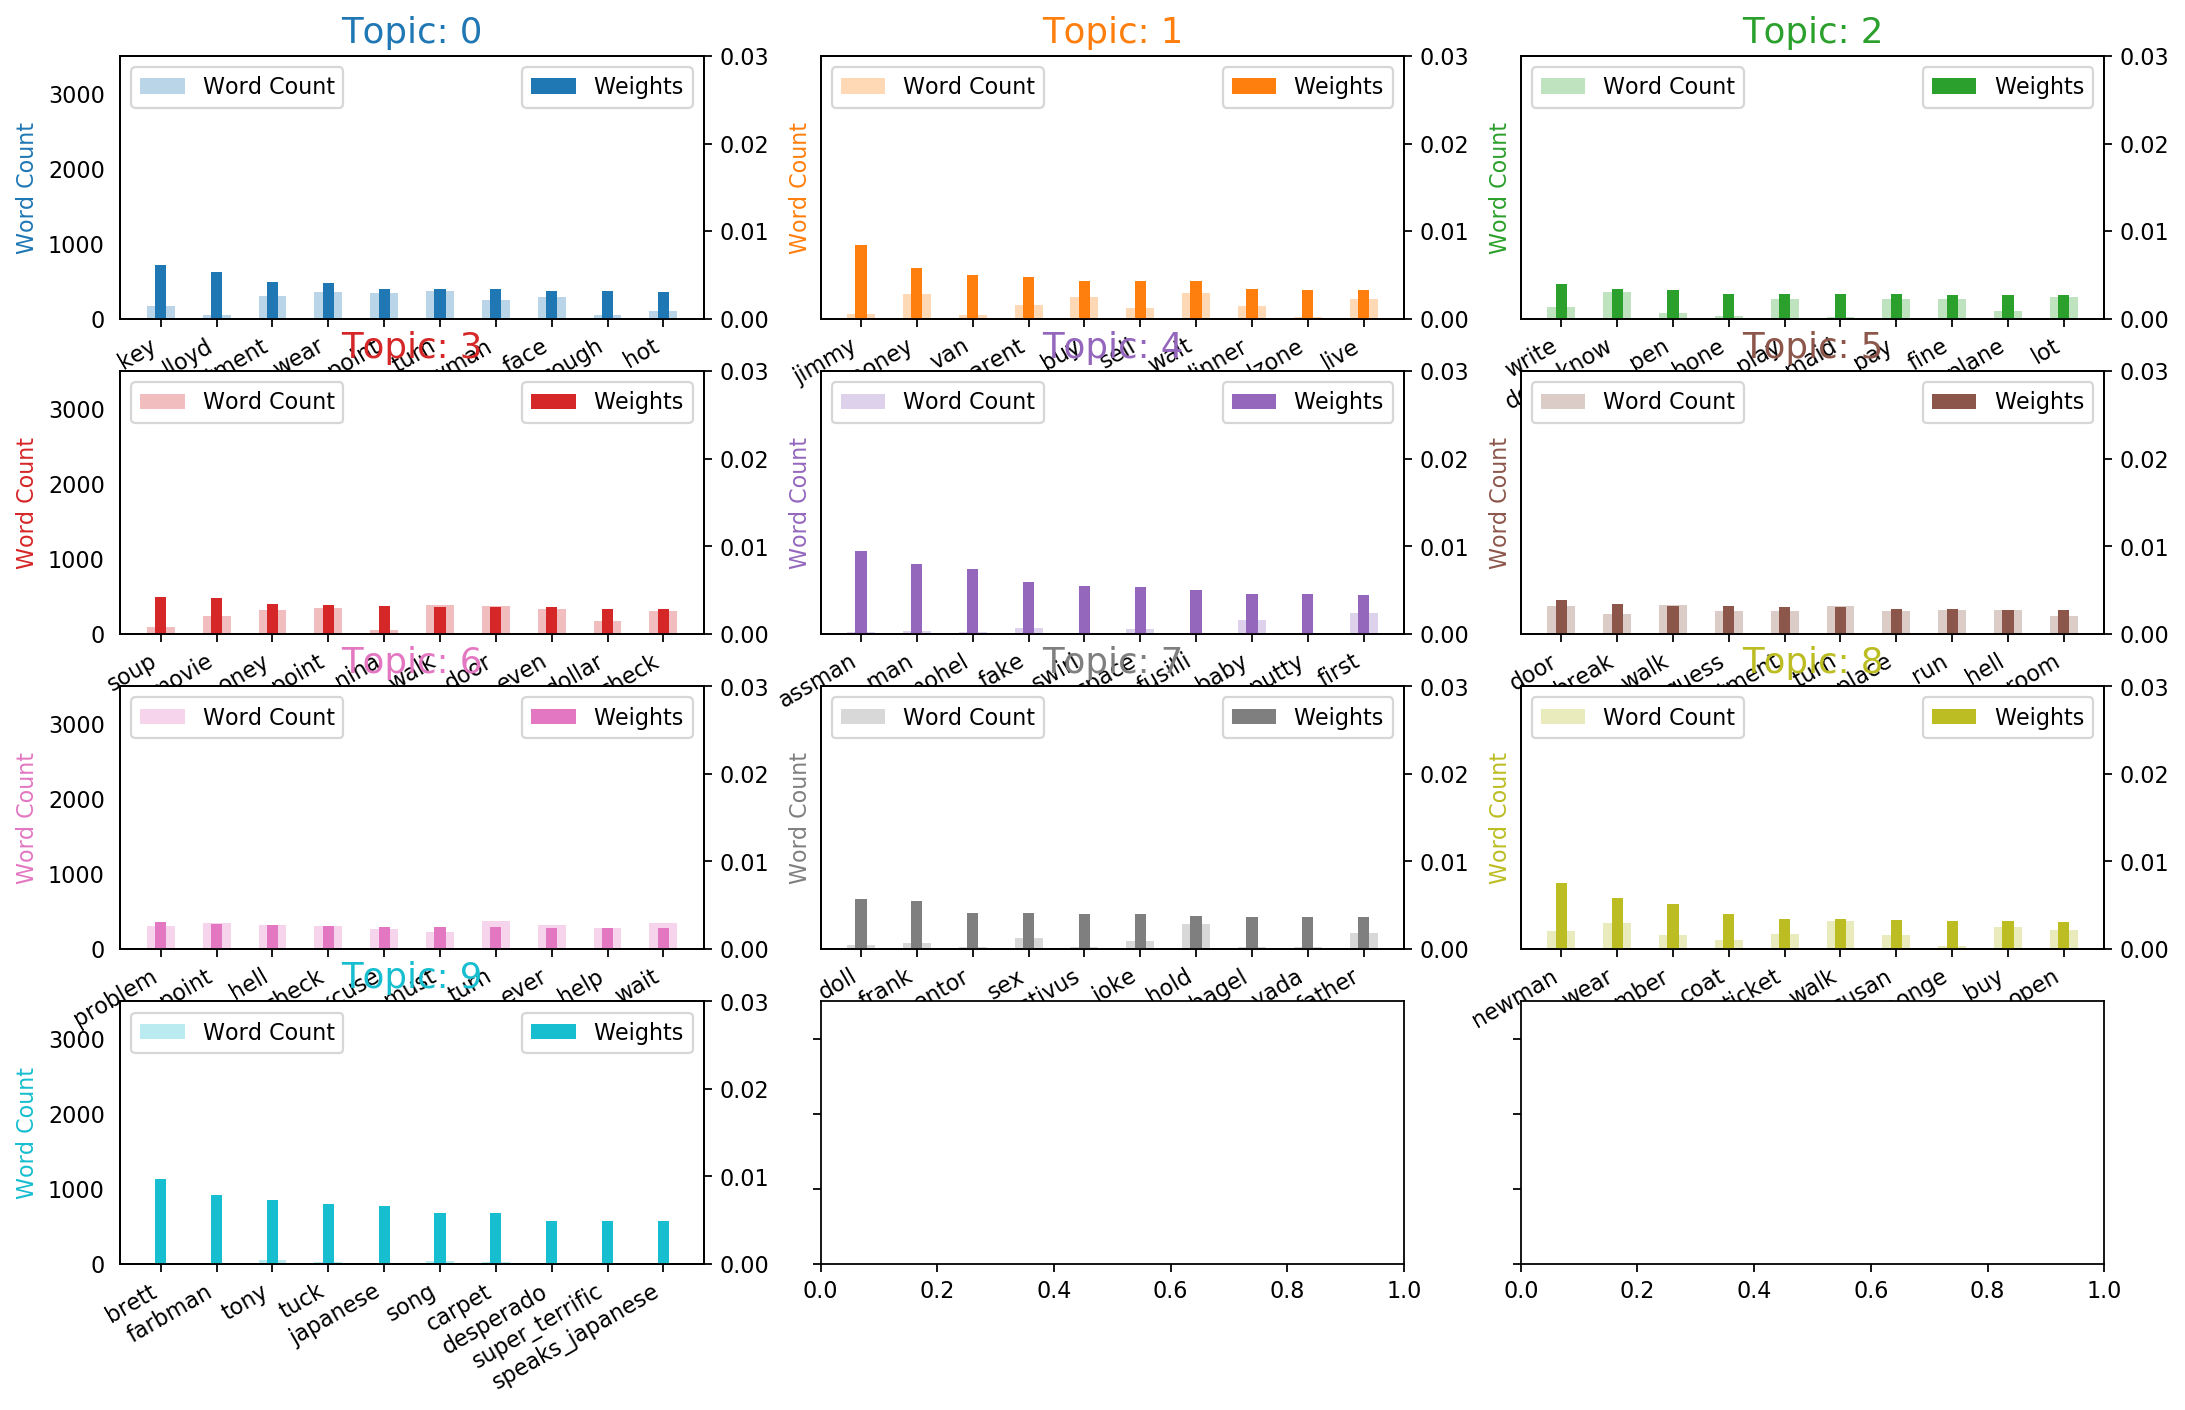

In [263]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_lemmatized for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(4, 3, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

509
442
484
456
488
463
472
442
438
507
524
474


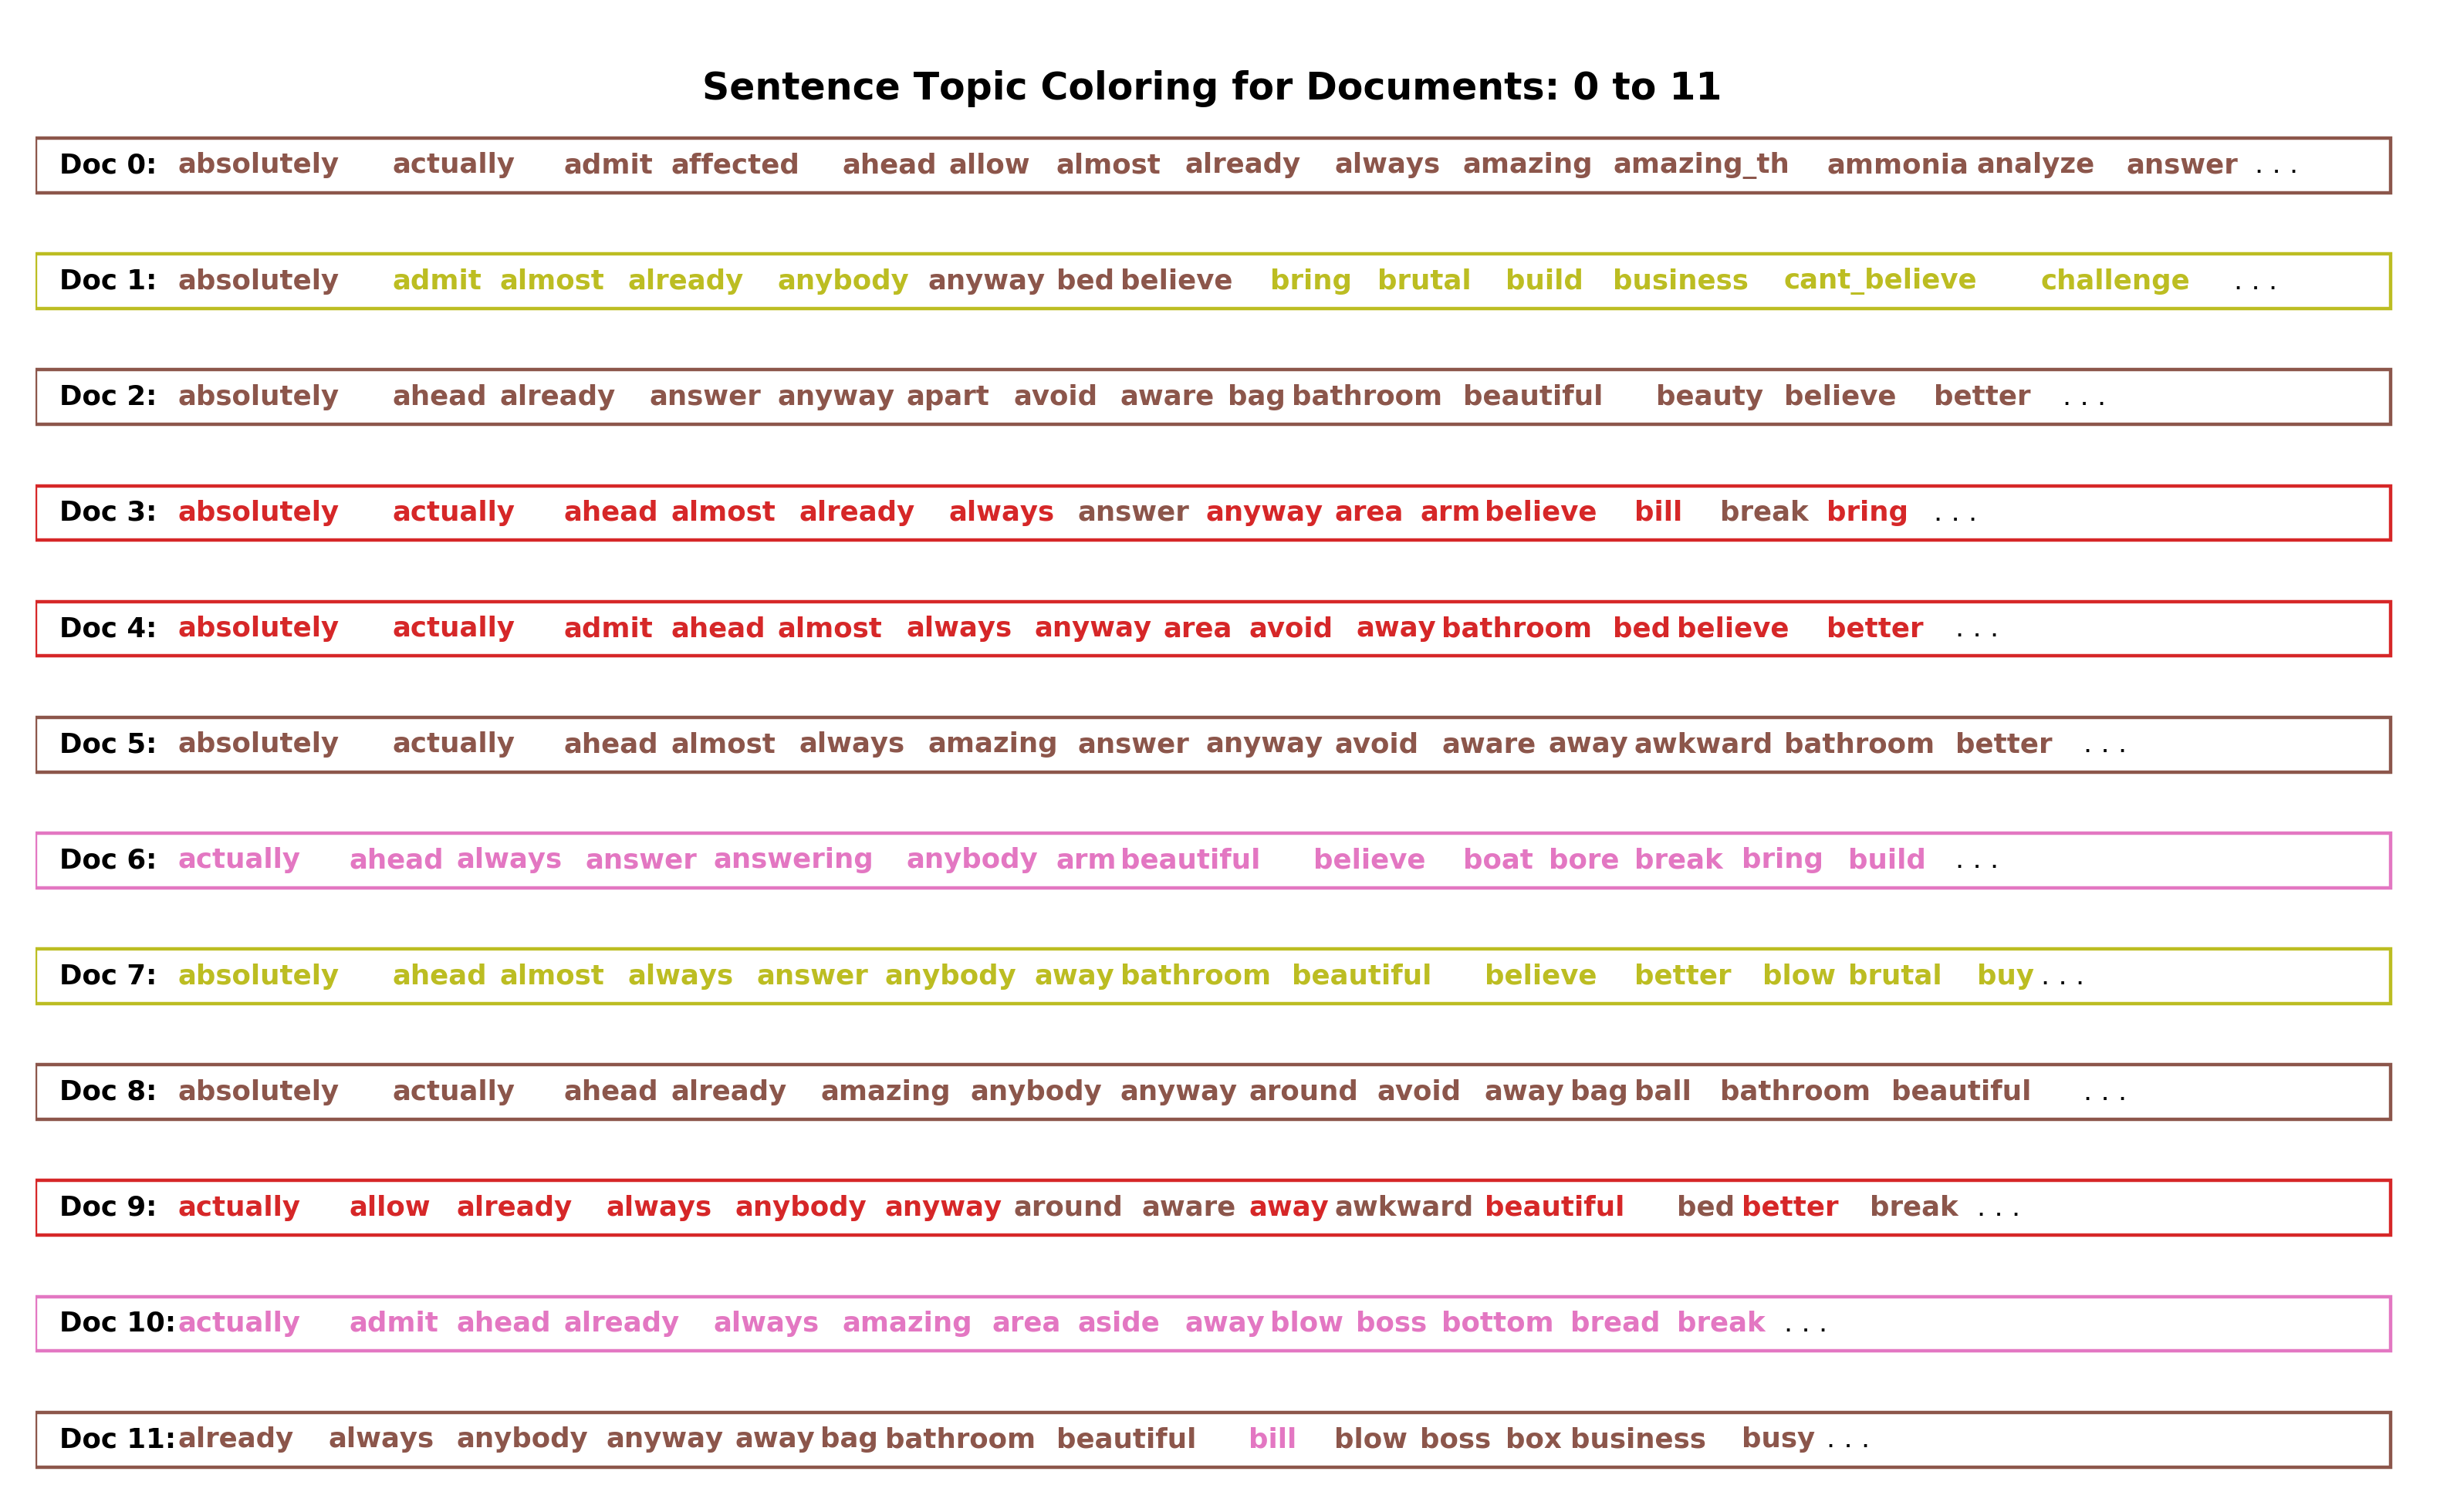

In [270]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]
            
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart() 

In [291]:
pd.options.display.max_colwidth = 1000
pd.options.display.max_rows = 1000

In [1]:
data

NameError: name 'data' is not defined

In [65]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(200)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0              0             5.0              0.9994   
1              1             8.0              0.5182   
2              2             5.0              0.9986   
3              3             3.0              0.5674   
4              4             3.0              0.7164   
5              5             5.0              0.9055   
6              6             6.0              0.8948   
7              7             8.0              0.9972   
8              8             5.0              0.9246   
9              9             3.0              0.6277   
10            10             6.0              0.6439   
11            11             5.0              0.5179   
12            12             0.0              0.9385   
13            13             0.0              0.4511   
14            14             6.0              0.9994   
15            15             1.0              0.6644   
16            16             6.0              0.9994   
17            17             6.0              0.9992   
18            18             5.0              0.9993   
19            19             2.0              0.8331   
20            20             6.0              0.3667   
21            21             6.0              0.8097   
22            22             1.0              0.6284   
23            23             6.0              0.9992   
24            24             2.0              0.7868   
25            25             2.0              0.5359   
26            26             6.0              0.9114   
27            27             2.0              0.5459   
28            28             7.0              0.5721   
29            29             3.0              0.9948   
..           ...             ...                 ...   
144          144             0.0              0.4476   
145          145             5.0              0.9524   
146          146             5.0              0.9802   
147          147             3.0              0.5595   
148          148             5.0              0.9724   
149          149             7.0              0.5920   
150          150             8.0              0.6752   
151          151             5.0              0.9191   
152          152             7.0              0.4732   
153          153             6.0              0.8241   
154          154             5.0              0.8637   
155          155             5.0              0.9994   
156          156             5.0              0.9119   
157          157             1.0              0.4795   
158          158             5.0              0.9108   
159          159             6.0              0.9132   
160          160             3.0              0.6691   
161          161             6.0              0.8288   
162          162             5.0              0.5541   
163          163             3.0              0.8022   
164          164             8.0              0.7233   
165          165             6.0              0.9323   
166          166             5.0              0.9069   
167          167             5.0              0.8179   
168          168             5.0              0.8976   
169          169             6.0              0.4342   
170          170             6.0              0.8641   
171          171             2.0              0.6863   
172          172             5.0              0.9813   
173          173             2.0              0.5196   

                                              Keywords  \
0    door, break, walk, guess, apartment, turn, pla...   
1    newman, wear, number, coat, ticket, walk, susa...   
2    door, break, walk, guess, apartment, turn, pla...   
3    soup, movie, money, point, nina, walk, door, e...   
4    soup, movie, money, point, nina, walk, door, e...   
5    door, break, walk, guess, apartment, turn, pla...   
6    problem, point, hell, check, excuse, must, tur...   
7    newman, wear, number, coat, ticket, walk, susa...   
8    door,

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
67            67             1.0              0.9987   
76            76             1.0              0.9936   
36            36             1.0              0.9315   
81            81             1.0              0.7621   
101          101             1.0              0.7445   
15            15             1.0              0.6644   
51            51             1.0              0.6643   
44            44             1.0              0.6595   
22            22             1.0              0.6284   
126          126             1.0              0.6180   
141          141             1.0              0.5381   
142          142             1.0              0.5040   
157          157             1.0              0.4795   

                                              Keywords  \
67   jimmy, money, van, parent, buy, sell, wait, di...   
76   jimmy, money, van, parent, buy, sell, wait, di...   
36   jimmy, money, van, parent, buy, sell, wait, di...   
81   jimmy, money, van, parent, buy, sell, wait, di...   
101  jimmy, money, van, parent, buy, sell, wait, di...   
15   jimmy, money, van, parent, buy, sell, wait, di...   
51   jimmy, money, van, parent, buy, sell, wait, di...   
44   jimmy, money, van, parent, buy, sell, wait, di...   
22   jimmy, money, van, parent, buy, sell, wait, di...   
126  jimmy, money, van, parent, buy, sell, wait, di...   
141  jimmy, money, van, parent, buy, sell, wait, di...   
142  jimmy, money, van, parent, buy, sell, wait, di...   
157  jimmy, money, van, parent, buy, sell, wait, di...   

                                                  Text  
67   So, does he like you? What do you think? You l...  
76   Hey, do you believe I got Happy New Yeared tod...  
36   You know its bad enough you have a car phone, ...  
81   You know their timing couldnt be worse. Is the...  
101  " That guy was amazing, he could dunk and he w...  
15   (A couple of days ago I used a public phone), ...  
51   Bah bah baaah, Boo doo bah bah bah, boo doo wa...  
44   So George and I went up to NBC and we told the...  
22   GEORGE, JERRY AND ELAINE, WHOS CARRYING A PLAS...  
126  I believe the doors on the bathroom stalls, he...  
141  So what happened to you yesterday? We were sup...  
142  Well, that was alright, huh? Yeah. Well, um, g...  
157  (on the phone) Yeah. Yeah. All right. Uh-huh. ...

In [81]:
# Take a look at info for this topic
df_info_mask = df_dominant_topic[df_dominant_topic['Dominant_Topic']==8].sort_values(by='Topic_Perc_Contrib', ascending=False)
df_info_mask
df_info_mask_indices = df_info_mask.index.values.astype(int)
df_info_mask_indices
df_docs_by_ep.iloc[df_info_mask_indices]

Dialogue  Lines_of_Dialogue  \
86   May I help you? Yeah, uh, I'm looking for a Ro...                291   
7    I hate clothes, okay? I hate buying them. I ha...                261   
96   You sure you don't want the tickets? No thanks...                333   
93   Well I am actually going to have a secretary a...                325   
71   The old-fashioned barber shop is unfortunately...                291   
115  Hey, boys and girls. I need you both to sponso...                325   
164  Careful, this plate is extremely hot. Thank yo...                332   
150  Uh, excuse me. Be with you in a minute. (turns...                305   
80   Good morning. Good morning. How'd you sleep? H...                347   
33   Wide open, I was wide open underneath! I had t...                301   
32   Why even try anymore? There's no sense to it. ...                300   
1    So, Im on line at the supermarket. Two women i...                346   
47   Jerry's apartment] She hasn't told her father ...                338   
60   ...And it *is* embarrassing, because a doggie ...                238   

       SEID  Season  Episode                                      Title  \
86   S06E02     6.0      2.0                              The Big Salad   
7    S02E03     2.0      3.0                                 The Jacket   
96   S06E12     6.0     12.0                            The Label Maker   
93   S06E09     6.0      9.0                              The Secretary   
71   S05E08     5.0      8.0                                 The Barber   
115  S07E09     7.0      9.0                                 The Sponge   
164  S09E12     9.0     12.0  The Reverse Peephole (a.k.a. The Man Fur)   
150  S08E20     8.0     20.0                             The Millennium   
80   S05E17     5.0     17.0                                   The Wife   
33   S03E17     3.0     17.0                          The Boyfriend (1)   
32   S03E16     3.0     16.0                                 The Fix-Up   
1    S01E01     1.0      1.0                               The Stakeout   
47   S04E08     4.0      8.0                        The Cheever Letters   
60   S04E21     4.0     21.0                             The Smelly Car   

       AirDate                       Writers            Director  IMDB_Rating  
86   29-Sep-94                   Larry David       Andy Ackerman          NaN  
7     6-Feb-91   Larry David, Jerry Seinfeld        Tom Cherones          8.4  
96   19-Jan-95      Alec Berg, Jeff Schaffer       Andy Ackerman          NaN  
93    8-Dec-94  Carol Leifer, Marjorie Gross  David Owen Trainor          NaN  
71   11-Nov-93                    Andy Robin        Tom Cherones          NaN  
115   7-Dec-95                 Peter Mehlman       Andy Ackerman          NaN  
164  15-Jan-98                Spike Feresten       Andy Ackerman          NaN  
150   1-May-97           Jennifer Crittenden       Andy Ackerman          NaN  
80   17-Mar-94                 Peter Mehlman        Tom Cherones          NaN  
33   12-Feb-92   Larry David and Larry Levin        Tom Cherones          8.9  
32    5-Feb-92    Elaine Pope, Larry Charles        Tom Cherones          8.5  
1    31-May-90   Larry David, Jerry Seinfeld        Tom Cherones          7.7  
47   28-Oct-92    Larry David, Larry Charles        Tom Cherones          NaN  
60   15-Apr-93    Larry David, Peter Mehlman        Tom Cherones          NaN

In [288]:
df_dominant_topic.iloc[3, 4]

'Most men like working on things. Tools, objects, fixing things. This is what men enjoy doing. Have you ever noticed a guys out in his driveway working on something with tools, how all the other men in the neighborhood are magnetically drawn to this activity. They just come wandering out of the house like zombies. Men, its true, men hear a drill, its like a dog whistle. Just... (his head perks up) you know, they go running up to that living room curtain, Honey, I think Jims working on something over there. So they run over to the guy. Now they dont actually help the guy. No, they just want to hang around the area where work is being done. Thats what men want to do. We want to watch the guy, we want to talk to him, we want to ask him dumb questions. You know, What are you using, a Phillips-head? You know, we feel involved. Thats why when they have construction sites, they have to have those wood panel fences around it, thats just to keep the men out. They cut those little holes for us s

In [280]:
data_lemmatized[0]

['single',
 'enjoyable',
 'experience',
 'ever',
 'whole_th',
 'home',
 'person',
 'home',
 'tryin',
 'imaginary',
 'ring',
 'cant_find',
 'must',
 'ready',
 'clothe',
 'shower',
 'ready',
 'cash',
 'spot',
 'reservation',
 'stand',
 'around',
 'whatta',
 'sleep',
 'tomorrow',
 'ever',
 'point',
 'shirt',
 'button',
 'possible',
 'spot',
 'second',
 'button',
 'literally',
 'break',
 'shirt',
 'high',
 'land',
 'live',
 'mother',
 'course',
 'buy',
 'purple',
 'actually',
 'recall',
 'consider',
 'button',
 'recall',
 'imaginary',
 'microphone',
 'senator',
 'decaf',
 'orange',
 'indicator',
 'miss',
 'decaf',
 'regular',
 'decaf',
 'regular',
 'challenge',
 'relax',
 'cup',
 'coffee',
 'claire',
 'professional',
 'waitress',
 'trust',
 'interest',
 'caffeine',
 'second',
 'tomorrow',
 'comin',
 'wait_second',
 'wait_second',
 'laura',
 'girl',
 'michigan',
 'teach',
 'political',
 'science',
 'night',
 'lans',
 'creamer',
 'milk',
 'wait_wait',
 'wait',
 'milk',
 'table',
 'real',
 'w

In [289]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

Topic_Num  Topic_Perc_Contrib  \
0        0.0              0.9897   
1        1.0              0.9978   
2        2.0              0.9989   
3        3.0              0.9993   
4        4.0              0.5184   
5        5.0              0.9995   
6        6.0              0.9994   
7        7.0              0.7324   
8        8.0              0.9989   

                                                                   Keywords  \
0        key, lloyd, apartment, wear, point, turn, newman, face, cough, hot   
1         jimmy, money, van, parent, buy, sell, wait, dinner, calzone, live   
2            write, dont_know, pen, bone, play, maid, pay, fine, plane, lot   
3          soup, movie, money, point, nina, walk, door, even, dollar, check   
4   assman, pig_man, mohel, fake, swirl, space, fusilli, baby, putty, first   
5         door, break, walk, guess, apartment, turn, place, run, hell, room   
6         problem, point, hell, check, excuse, must, turn, ever, help, wait   
7  doll, frank, mentor, sex, festivus, joke, hold, bagel, yada_yada, father   
8        newman, wear, number, coat, ticket, walk, susan, sponge, buy, open   

                                                                                   Representative Text  
0  These are great! Just great! Really great! Really, really great! Dont you think so, Elaine? Yeah...  
1  So, does he like you? What do you think? You like him? Yeah, yeah like him, definitely like him....  
2  Let me ask you a question. If you named a kid Rasputin do you think that would have a negative e...  
3  (laughing) Kramer, would you hold still? I cant do this if you keep moving. You sure you dont wa...  
4  Jerry and Elaine are outside, heading towards the apartment building] I hear youre going out wit...  
5  George, are you sure I cant show you any other cars? I dont think so, Vic. Ive done my homework....  
6  Night club] Men flip around the television more than women, I think. Men get that remote control...  
7  I dont want to *live*! I dont want to *live*! Because of me? You must be joking! Who wouldnt wan...  
8  May I help you? Yeah, uh, Im looking for a Rollamech 1000 mechanical pencil. Oh, I know the Roll...